# Data Science Intern at Let's Grow More LGMVIP JUNE 2022
# Beginner Level Task
# Iris Flowers Classification ML Project
# Nitin

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Importing Data Set 

In [2]:
# Reading Data set
data=pd.read_csv('iris_data.csv')
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Giving Proper Heading to Columns

In [3]:
data_header = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
data.to_csv('Iris.csv', header = data_header, index = False)
new_data = pd.read_csv('Iris.csv')
new_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Checking no. of rows and columns

In [4]:
new_data.shape

(149, 5)

### Checking datatypes in dataset

In [5]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  149 non-null    float64
 1   SepalWidth   149 non-null    float64
 2   PetalLength  149 non-null    float64
 3   PetalWidth   149 non-null    float64
 4   Species      149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Describing the Dataset

In [6]:
new_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking null values in Dataset

In [7]:
new_data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

# Data Visualization 

## Graphs of features vs Species

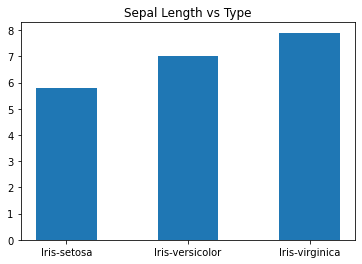

In [8]:
plt.bar(new_data['Species'],new_data['SepalLength'], width = 0.5) 
plt.title("Sepal Length vs Type")
plt.show()

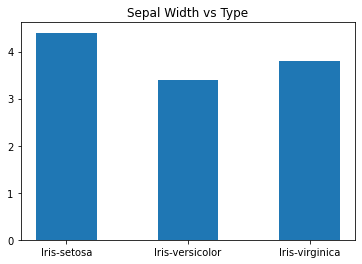

In [9]:
plt.bar(new_data['Species'],new_data['SepalWidth'], width = 0.5) 
plt.title("Sepal Width vs Type")
plt.show()

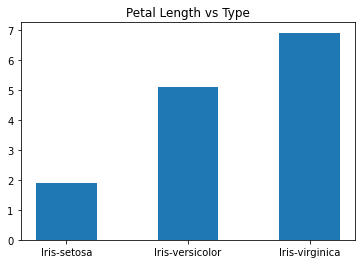

In [10]:
plt.bar(new_data['Species'],new_data['PetalLength'], width = 0.5) 
plt.title("Petal Length vs Type")
plt.show()

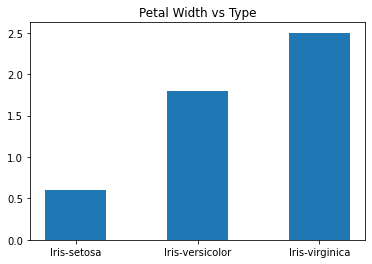

In [11]:
plt.bar(new_data['Species'],new_data['PetalWidth'], width = 0.5) 
plt.title("Petal Width vs Type")
plt.show()

## Pair plot for Dataset

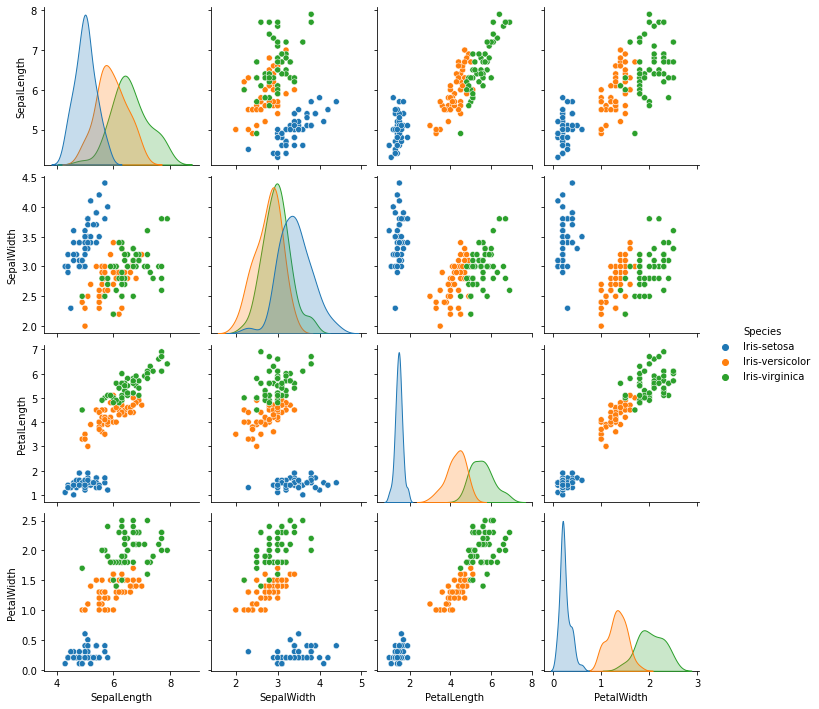

In [12]:
sns.pairplot(new_data,hue='Species')

# Splitting the Dataset

In [13]:
x = new_data.drop(columns="Species")
y = new_data["Species"]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 1)

In [15]:
x_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
12,4.3,3.0,1.1,0.1
2,4.6,3.1,1.5,0.2
97,5.1,2.5,3.0,1.1
112,5.7,2.5,5.0,2.0
103,6.5,3.0,5.8,2.2


In [16]:
x_test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
145,6.3,2.5,5.0,1.9
89,5.5,2.6,4.4,1.2
54,5.7,2.8,4.5,1.3
77,6.0,2.9,4.5,1.5
84,6.0,3.4,4.5,1.6


In [17]:
y_train.head()

12         Iris-setosa
2          Iris-setosa
97     Iris-versicolor
112     Iris-virginica
103     Iris-virginica
Name: Species, dtype: object

In [18]:
y_test.head()

145     Iris-virginica
89     Iris-versicolor
54     Iris-versicolor
77     Iris-versicolor
84     Iris-versicolor
Name: Species, dtype: object

In [19]:
print("x_train: ", len(x_train))
print("x_test: ", len(x_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

x_train:  89
x_test:  60
y_train:  89
y_test:  60


# Building Model using Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\91881\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predict = model.predict(x_test)
print("Pridicted values on Test Data", predict)

Pridicted values on Test Data ['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-vir

In [23]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [24]:
print("Training Accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy : ", accuracy_score(y_test, y_test_pred))

Training Accuracy :  0.9775280898876404
Test Accuracy :  0.95


# Conclusion
# Hence we conclude that we did Iris Flower Classification using Logistic Regression and we got Training Accuracy: 97% and Test Accuracy: 95%.